In [1]:
import matplotlib.pyplot as plt
import os.path
import numpy as np
import json
import random

In [2]:
all_result = {}
path = 'tune_output/clip_fs_imagenet/fs/imagenet'
for method in list(os.scandir(path)):
    if os.path.isfile(os.path.join(path, method.name, 'merge_result.json')):
        all_result[method.name] = json.load(open(os.path.join(path, method.name, 'merge_result.json'), 'r'))

In [4]:
name_change = {
    'adaptformer': 'AdaptFormer',
    'fact_tk_32':'FacT_TK', 
    'bitfit': 'BitFit', 
    'lora_32': 'LoRA', 
    'full': 'Full', 
    'rand_h_adapter_32':'Adapter',
    'ln': 'LayerNorm', 
    'convpass': 'Convpass', 
    'repadapter': 'RepAdapter'
}

In [5]:
for method in all_result.keys():
    method_result = all_result[method]
    ood = []
    for data in method_result:
        if data != 'fs-imagenet':
            ood.append(method_result[data])
    ood_arr = np.array(ood)
    ood_mean = np.mean(ood_arr, axis=0)
    all_result[method]['mean']= ood_mean

In [7]:
all_result.keys()

dict_keys(['repadapter', 'ln', 'adaptformer', 'convpass', 'fact_tk_32', 'bitfit', 'lora_32', 'full', 'rand_h_adapter_32'])

In [9]:
method_name = ['convpass',
               'full',
               'repadapter',
               'rand_h_adapter_32',
               'lora_32',
               'fact_tk_32',
               'bitfit',
               'ln',
               'adaptformer']


In [10]:
data_change = {
    'eval_imagenet-s': 'ImageNet-Sketch',
    'eval_imagenet-r': 'ImageNet-Rendition',
    'eval_imagenet-v2': 'ImageNet-V2',
    'eval_imagenet-a': 'ImageNet-Adversarial',
}

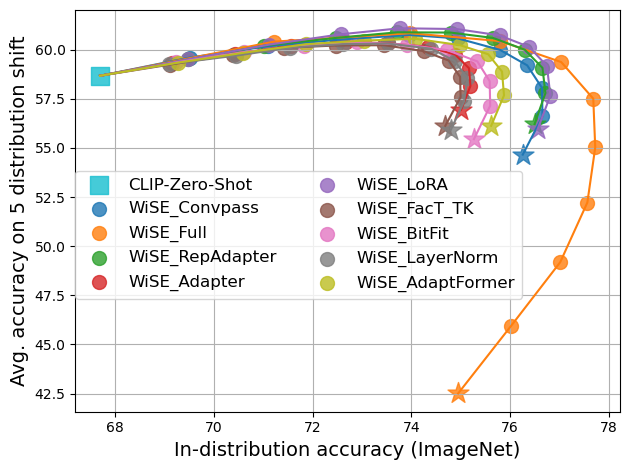

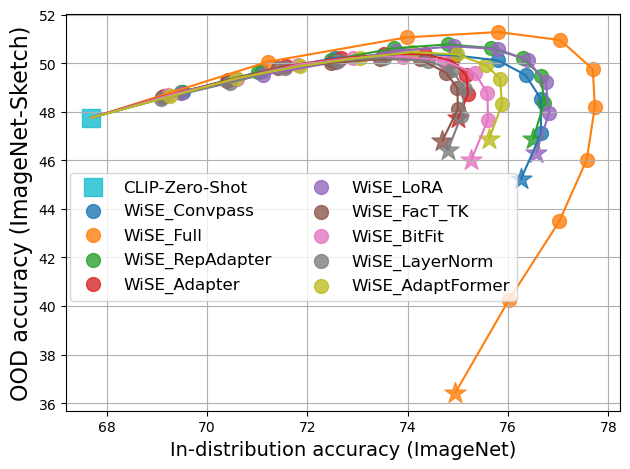

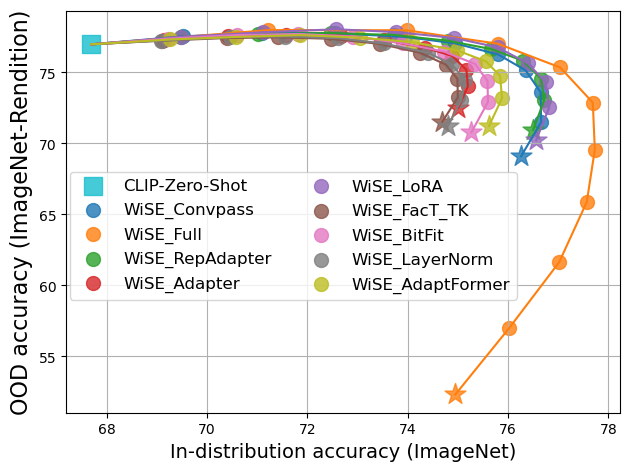

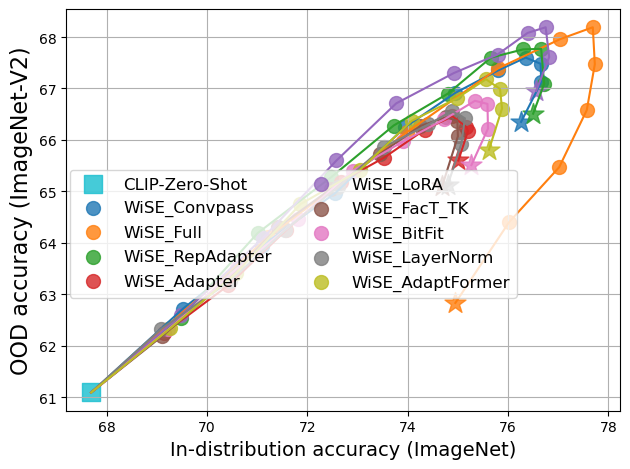

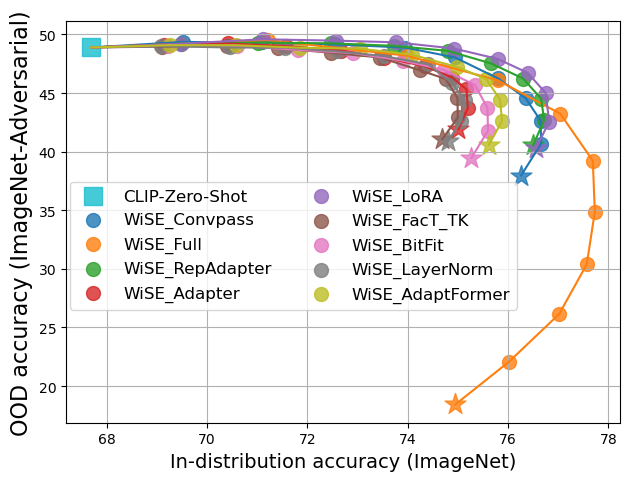

In [11]:
for target in ['mean', 'eval_imagenet-s', 'eval_imagenet-r', 'eval_imagenet-v2', 'eval_imagenet-a']:
    fig, ax = plt.subplots()
    for idx, i in enumerate(method_name):
        method = all_result[i]
        x = method["fs-imagenet"]
        y = method[target]
        if idx == 0:
            ax.scatter(
                x[0], y[0],
            label=f"CLIP-Zero-Shot", marker='s', s=150, alpha=0.8, c=f'C9',
            )
        ax.scatter(
        x[-1], y[-1], marker='*', s=250, alpha=0.8, c=f'C{idx}',
        )
        ax.scatter(
            x[1:-1], y[1:-1],
            label=f"WiSE_{name_change[i]}", marker='o', s=100, alpha=0.8, c=f'C{idx}'
        )
        plt.plot(x, y, c=f'C{idx}') 
    ax.set_xlabel('In-distribution accuracy (ImageNet)', fontsize=14)
    if target == 'mean':
        ax.set_ylabel(f'Avg. accuracy on 5 distribution shift', fontsize=14)
    else:
        ax.set_ylabel(f'OOD accuracy ({data_change[target]})', fontsize=16)
    plt.grid()
    ax.legend(
        loc='upper center', bbox_to_anchor=(0.41, 0.62),
        ncol=2, fancybox=True, fontsize=12
    )
    plt.tight_layout()
    plt.savefig(f'merge_{target}.pdf', bbox_inches='tight', pad_inches=0)